In [1]:
 ## Introductionto packages
    ## This how to install packages

using LinearAlgebra, Statistics, Plots, LaTeXStrings

In [2]:
## Code to draw a random number from a standard normal distribution
   ## I've added the "@show" command to demonstrate how to see all of the outputs not just the last line
@show randn()
@show randn()

randn() = 1.4186143371387652
randn() = -1.264333533105376


-1.264333533105376

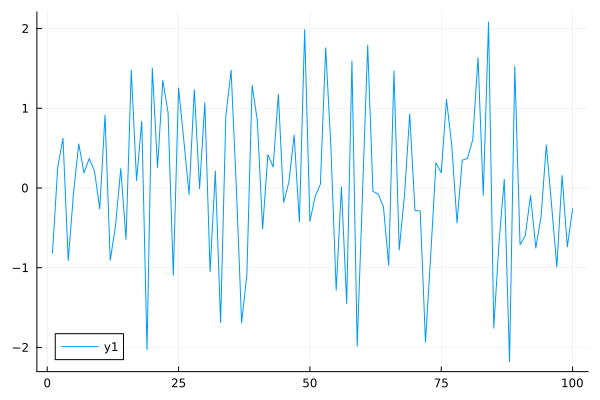

In [3]:
## How to use functionms from multiple packages
   ## 
n = 100
ep = randn(n)
plot(1:n, ep)

In [4]:
## Array

## To know what something is

@show typeof(ep)

## To get the first 5 elements of an array

@show ep[1:5]

typeof(ep) = Vector{Float64}
ep[1:5] = [-0.8168271204917879, 0.2607039421937533, 0.623564632951511, -0.9111428130011789, -0.06786507939730155]


5-element Vector{Float64}:
 -0.8168271204917879
  0.2607039421937533
  0.623564632951511
 -0.9111428130011789
 -0.06786507939730155

In [5]:
## Below shows how to get help on a command

In [6]:
?typeof

search: typeof typejoin TypeError



```
typeof(x)
```

Get the concrete type of `x`.

See also [`eltype`](@ref).

# Examples

```jldoctest
julia> a = 1//2;

julia> typeof(a)
Rational{Int64}

julia> M = [1 2; 3.5 4];

julia> typeof(M)
Matrix{Float64} (alias for Array{Float64, 2})
```


In [7]:
## For loops

## Option 1 (poor style)
   ## How to convert an array of zeros to random draws from a standard normal distribution
n = 100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

ϵ[1:5]

## Option 2 (better style)
   ##
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

ϵ[1:5]

5-element Vector{Float64}:
 -1.8097723576329696
  0.5641499898009256
  0.5304846192456164
 -0.016309185480177825
 -0.6365859464781266

In [8]:
## Loop for summing the first 5 ϵ values (from earlier) and taking the mean 
   ##
ϵ_sum = 0.0
m = 5
for ϵ_val in ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val
end
@show ϵ_mean = ϵ_sum / m

## Using built in function to calculate the mean
@show mean(ϵ[1:m])

ϵ_mean = ϵ_sum / m = -0.2736065761089464
mean(ϵ[1:m]) = -0.2736065761089464


-0.2736065761089464

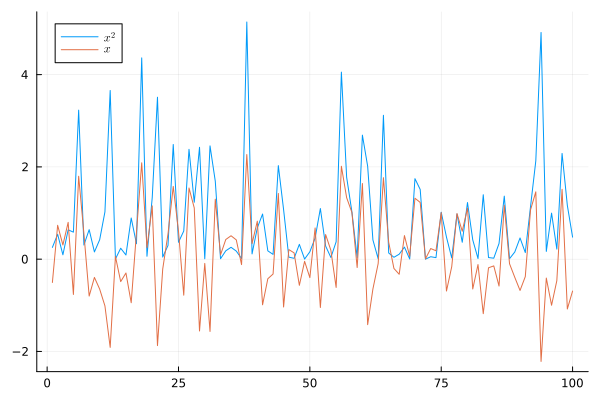

In [9]:
## User defined function
   ## Example how to generate random variables

## Option 1 (poor style)
   ##
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2 # Square the result
    end
    return ϵ
end

generatedata(100000)
plot(ϵ)


## Option 2 (still poor style)
   ##
function generatedata(n)
    ϵ = randn(n)
    
    for i in eachindex(ϵ)
        ϵ[i] = ϵ[i]^2
    end
    return ϵ
end
data = generatedata(5)

## Option 3 (better style)
   ##
function generatedata(n)
    ϵ = randn(n) # use a built function
    return ϵ .^2
end
data = generatedata(5)

## Option 4 (good style) 
   ## no longer uses function
generatedata(n) = randn(n) .^2
data = generatedata(5)

## Option 5 (good style)
   ##
f(x) = x^2
generatedata(n) = f.(randn(n))
data = generatedata(5)

## Simplist
   ##
n = 100
f(x) = x^2

x = randn(n)
plot(f.(x), label = L"x^2") # the L operation tells it to use LaTeX
plot!(x, label = L"x") # layer on the same plot


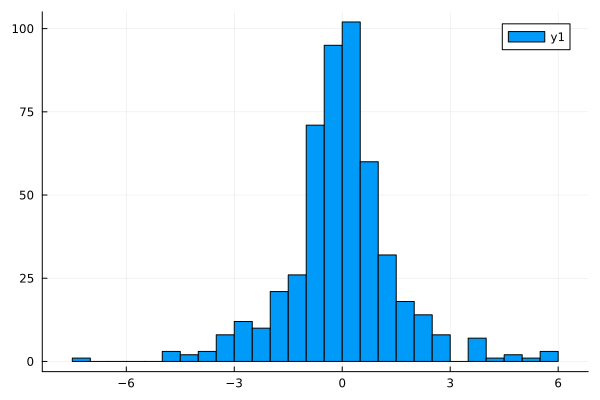

In [10]:
## Using the distributions package
   ##
using Distributions

function plothistogram(distribution, n)
    ϵ = rand(distribution, n) # n draws from a distribution
    histogram(ϵ)
end
lp = Laplace()
plothistogram(lp, 500)  

In [11]:
## Solving some more complicated math
   ##
ρ = 1.0 
β = 0.9

maxiter = 1000
tolerance = 1.0E-7
v_0 = 0.8 # initial condition

## Set up algorithim
   ##
v_old = v_0
normdiff = Inf
iter = 1

while normdiff > tolerance && iter <= maxiter
    v_new = ρ + β * v_old # this is the new f(v) map
    normdiff = norm(v_new - v_old)
    
    # replace the initial conditions
    v_old = v_new
    iter = iter + 1
end
println("Fixed point = $v_old
    |f(x) - x| = $normdiff in $iter iterations") 

Fixed point = 9.999999173706609
    |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [12]:
## Checking what the norm() function does

In [13]:
?norm

search: norm Normal normpath normdiff normalize normalize! NormalCanon



```
norm(A, p::Real=2)
```

For any iterable container `A` (including arrays of any dimension) of numbers (or any element type for which `norm` is defined), compute the `p`-norm (defaulting to `p=2`) as if `A` were a vector of the corresponding length.

The `p`-norm is defined as

$$
\|A\|_p = \left( \sum_{i=1}^n | a_i | ^p \right)^{1/p}
$$

with $a_i$ the entries of $A$, $| a_i |$ the [`norm`](@ref) of $a_i$, and $n$ the length of $A$. Since the `p`-norm is computed using the [`norm`](@ref)s of the entries of `A`, the `p`-norm of a vector of vectors is not compatible with the interpretation of it as a block vector in general if `p != 2`.

`p` can assume any numeric value (even though not all values produce a mathematically valid vector norm). In particular, `norm(A, Inf)` returns the largest value in `abs.(A)`, whereas `norm(A, -Inf)` returns the smallest. If `A` is a matrix and `p=2`, then this is equivalent to the Frobenius norm.

The second argument `p` is not necessarily a part of the interface for `norm`, i.e. a custom type may only implement `norm(A)` without second argument.

Use [`opnorm`](@ref) to compute the operator norm of a matrix.

# Examples

```jldoctest
julia> v = [3, -2, 6]
3-element Vector{Int64}:
  3
 -2
  6

julia> norm(v)
7.0

julia> norm(v, 1)
11.0

julia> norm(v, Inf)
6.0

julia> norm([1 2 3; 4 5 6; 7 8 9])
16.881943016134134

julia> norm([1 2 3 4 5 6 7 8 9])
16.881943016134134

julia> norm(1:9)
16.881943016134134

julia> norm(hcat(v,v), 1) == norm(vcat(v,v), 1) != norm([v,v], 1)
true

julia> norm(hcat(v,v), 2) == norm(vcat(v,v), 2) == norm([v,v], 2)
true

julia> norm(hcat(v,v), Inf) == norm(vcat(v,v), Inf) != norm([v,v], Inf)
true
```

---

```
norm(x::Number, p::Real=2)
```

For numbers, return $\left( |x|^p \right)^{1/p}$.

# Examples

```jldoctest
julia> norm(2, 1)
2.0

julia> norm(-2, 1)
2.0

julia> norm(2, 2)
2.0

julia> norm(-2, 2)
2.0

julia> norm(2, Inf)
2.0

julia> norm(-2, Inf)
2.0
```

---

```
norm(h::Histogram)
```

Calculate the norm of histogram `h` as the absolute value of its integral.


In [14]:
## Turns ot it takes the p-norm of a vector.
## p-norms are used to calculate the distance between points
## 2-norm takes the #D distance between points
## e.g. if you have a vector c = (3, -1, 6) from an initial point you move 3 right 1 down and 6 forward
## similar to calculating the hypotenuse but for a 3D pyrimid
## you esstentially squareroot the sum of squares
## if you do norm(1) it just equals 1

In [15]:
## Another way to iterate and calculate the fixed point
   ##
v_old = v_0
norm_diff = Inf
iter = 1
for i in 1:maxiter
    v_new = ρ + β * v_old
    normdiff = norm(v_new - v_old)
    if normdiff < tolerance 
        iter = i
    end
    v_old = v_new
end
println("Fixed point  = $v_old
    |f(x) - x| = $normdiff in $iter iterations")

Fixed point  = 9.999999999999995
    |f(x) - x| = 0.0 in 1000 iterations


In [16]:
## Using a function to calculate the fixed point
   ##
function v_fp(beta, ρ, v_iv, tolerance, maxiter)
    # Set up algorithm
    v_old = v_iv
    normdiff = Inf
    iter = 1
    
    while normdiff > tolerance && iter <= maxiter
        v_new = p + beta * v_old
        normdiff = norm(v_new - v_old)
        
        v_old = v_new
        iter = iter + 1
    end
    return (v_old, normdiff, iter)
end
p = 1.0
beta = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8

v_star, normdiff, iter = v_fp(beta, p, v_initial, tolerance, maxiter)
println("Fixed point = $v_star
  |f(x) - x| = $normdiff in $iter iterations") 

Fixed point = 9.999999173706609
  |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [17]:
## The function above is fine, but it could be better
## For example, you can only use the function to solve for the fixed point of this specific function: f(v) = p + beta * v
## You can fix this...

In [18]:
function fixedpointmap(f, iv, tolerance, maxiter)
    ## set up algorithim
    x_old = iv
    norm_diff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old)
        norm_diff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (x_old, norm_diff, iter)
end

## Define a map and parameters
   ##
p = 1.0
beta = 0.9
f(v) = p + beta * v

maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8

v_star, norm_diff, iter = fixedpointmap(f, v_initial, tolerance, maxiter)
println("Fixed point = $v_star
  |f(x) - x| = $norm_diff in $iter iterations")

Fixed point = 0.8
  |f(x) - x| = Inf in 1 iterations


In [19]:
# better style
function fixedpointmap(f, iv, tolerance, maxiter)
    # setup the algorithm
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (x_old, normdiff, iter)
end

# define a map and parameters
p = 1.0
beta = 0.9
f(v) = p + beta * v # note that p and beta are used in the function!

maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 # initial condition

v_star, normdiff, iter = fixedpointmap(f, v_initial, tolerance, maxiter)
println("Fixed point = $v_star
  |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609
  |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [20]:
## Named arguements and return values
   ##
function fixedpointmap(f, iv; tolerance = 1E-7, maxiter = 1000)
    # set up the algorithim
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (; value = x_old, normdiff, iter) # A named tuple
end

## Define a map and parameters
p = 1.0
beta = 0.9
f(v) = p + beta * v # Note that beta and p are used in the function

sol = fixedpointmap(f, 0.8; tolerance = 1.0E-8) # Don't need to pass
println("Fixed point map = $(sol.value)
    |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")


Fixed point map = 9.999999918629035
    |f(x) - x| = 9.041219328764782e-9 in 177 iterations


In [21]:
## best style
using NLsolve

p = 1.0
beta = 0.9
f(v) = p .+ beta * v # broadcast the +
sol = fixedpoint(f, [0.8]; m = 0)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero)
    |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = [9.999999909587816]
    |f(x) - x| = 9.041219328764782e-9 in 176 iterations


In [22]:
## best style
p = 1.0
beta = 0.9
iv = [0.8]
sol = fixedpoint(v -> p .+ beta * v, iv)
fnorm = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero)
    |f(x) - x| = $fnorm in $(sol.iterations) iterations
    converged = $(sol.f_converged)")

Fixed point = [9.999999999999972]
    |f(x) - x| = 3.552713678800501e-15 in 3 iterations
    converged = true


In [27]:
## Use arbitrary precision points
    ##
p = 1.0
beta = 0.9
iv = [BigFloat(0.8)] ## higher precision

## Otherwise, the same as above
   ##
sol = fixedpoint(v -> p .+ beta * v, iv)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero)
    |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = BigFloat[10.00000000000000222044604925031357388532909931412848377287867809936811555686155]
    |f(x) - x| = 0.0 in 3 iterations


In [39]:
## Exercises
   ##

## Exercise 1
   ##
@show factorial(4) ## Use the factorial function

## Create your own factorial function
   ##
function factorial2(n)
    val = 1
    for i in 1:n
        factorial = val * i
        val = factorial
    end
return val
end

@show factorial2(4)

factorial(4) = 24
factorial2(4) = 24


24